In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as rf

In [3]:
df = pd.read_csv("train.csv")
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
x = df.drop("TARGET",axis=1)
y = df["TARGET"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Removing duplicates

In [8]:
df.duplicated().sum()

0

# Checking Correlation

<AxesSubplot:>

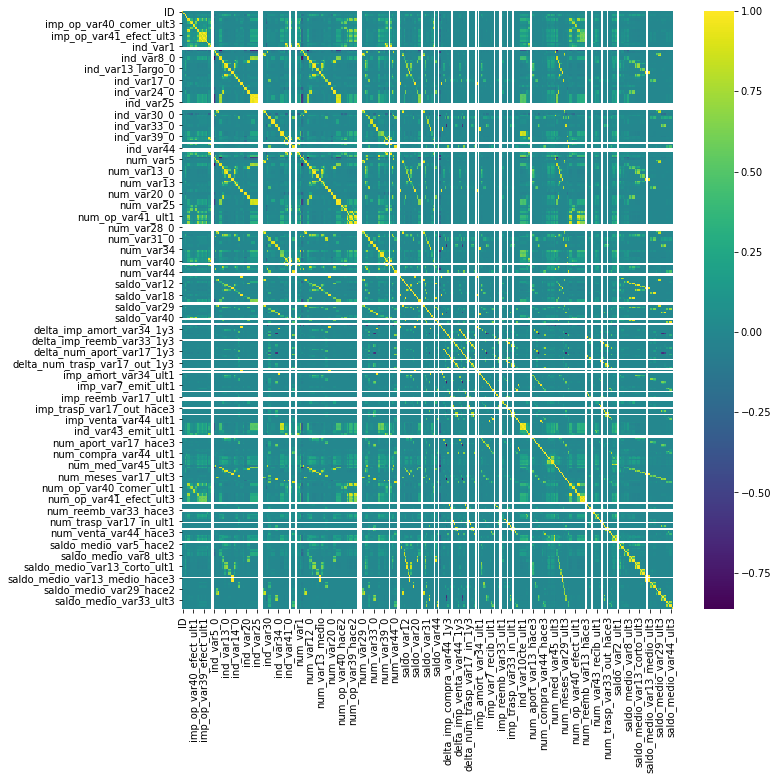

In [11]:

c = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(c,cmap="viridis")

In [12]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [13]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))

206

In [14]:
x_train2 = x_train.drop(corr_features,axis=1)
x_test2 = x_test.drop(corr_features,axis=1)

In [63]:
 clf = rf(random_state=0)
 clf.fit(x_train,y_train)
 y_pred = clf.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score as asc
print(asc(y_test,y_pred))

0.9576427255985267


In [65]:
 clf2 = rf(random_state=0)
 clf2.fit(x_train2,y_train)
 y_pred2 = clf2.predict(x_test2)

In [66]:
print(asc(y_test,y_pred2))

0.9579935104796983


In [28]:
x_val = pd.read_csv("test.csv")
x_val.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [31]:
id = x_val["ID"]

In [67]:
y_val1 = clf.predict(x_val)

In [68]:
x_val2 = x_val.drop(corr_features,axis=1)
y_val2 = clf2.predict(x_val2)

In [69]:
id = x_val["ID"]
id2 = id.copy()


In [70]:
out1 = {"ID":x_val["ID"],
"TARGET":y_val1}
out1 = pd.DataFrame(out1) 

In [71]:
out2 = {"ID":x_val["ID"],
"TARGET":y_val1}
out2 = pd.DataFrame(out2)

In [72]:
out1.to_csv("out1.csv",index=False)
out2.to_csv("out2.csv",index=False)

In [74]:
len(corr_features)

206